<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2023<br>
<font color=3C99D size=5>
    Practical Assignment 2 Solution - CSP <br>
<font color=696880 size=4>
    Mohammad Mahdi Abootorabi 

____

# Q1- CSP (50 Points)

In this question, we are going to plan for some future events in the country. There are some halls that can host different kinds of events, such as concerts, sports events, etc.

Two halls are considered adjacent if the distance between them is less than a threshold. Two adjacent halls cannot host the same event.

With these constraints, complete the code below and assign an event to each hall to satisfy every constraint.



## Example
Look at this example carefully:<br>
<img src="Images/CSP_example.png" width="500"/>
  - There are $6$ halls and $3$ kinds of events.
  - The halls in which each event can be held (for example, sport events can be held only at hall 1, 4 and 6).
  - Adjacent halls (we show adjacent halls here with a line between them) cannot host the same event (for example, halls 1 and 2 both cannot host concert events).

## Note
  - You _must_ implement and use AC-3 algorithm.
  - You will _probably_ need to utilize the heuristic algorithms you have learned (e.g. MRV and LCV) or consider nearly tree-structured graphs approach in order to pass all tests in an appropriate time.

## Input
  - The first line consists of $N$ (count of halls) and $M$ (count of event kinds).
  - In the following $M$ lines, the $i$ th line ($1 \le i \le M$) is a list of preferred halls for the $i$ th event (separated by space).
  - In the next line, $E$, the total number of adjacent constraints (edges in the previous graph) are given.
  - in each of the following $E$ lines, a pair of hall numbers (separated by space) is given.
$$1 \le N \le 50$$
$$1 \le M \le 50$$

### Sample Input
This sample describes the previous example (sport=1, concert=2, fashion=3).
```
6 3
1 4 6
1 2 3 5 6
3 4 5
5
1 2
2 3
3 4
3 5
3 6
```

## Output
In the only line, print:
  - list of one appropriate assignment ordered by hall number (separated by space).
  - `NO` if there isn't.

### Sample Output
One possible solution to the example above is {Hall1=sport, Hall2=concert , Hall3=fashion, Hall4=sport, Hall5=concert, Hall6=concert}. So:
```
1 2 3 1 2 2
```
In another example, If Hall3 was not an option for fashion, then the answer would be:
```
NO
```
Because then hall 2 or 3 would be empty.

## Your code
**Note:** It's OK to change the signature for the given functions and the given structure is just a suggestion to help you with the implementation. (you can't remove or add any cells)

In [5]:
# Auxiliary functions

In [44]:
import copy

def get_neis(var, csp_constraints):
    neis = []
    for h1, h2 in csp_constraints:
        if h1 == var:
            neis.append(h2)
        elif h2 == var:
            neis.append(h1)
    return neis

def ac_3(csp_domains, csp_constraints):
    #################################################################
    # (Point: 15% of total score)                                   #
    # This function returns false                                   #
    # if an inconsistency is found and true otherwise.              #
    # Feel free to also implement a `revise` function in this cell. #
    #################################################################
    queue = copy.copy(csp_constraints)
    new_domains = copy.deepcopy(csp_domains)
    while len(queue) > 0:
        h1, h2 = queue.pop(0)
        for v1 in copy.deepcopy(csp_domains[h1]):
            found_consistent_v2 = False
            for v2 in csp_domains[h2]:  # revise function. (In this problem this is O(1))
                if v1 != v2:
                    found_consistent_v2 = True
                    break
            if not found_consistent_v2:
                new_domains[h1].remove(v1)
                if len(new_domains[h1]) == 0:
                    return None
                for x in get_neis(h1, csp_constraints):
                    queue.append((x, h1))
    return new_domains

In [40]:
import numpy as np

def is_failed(csp_constraints, assignment):
    for h1, h2 in csp_constraints:
        if assignment[h1] == assignment[h2] and assignment[h1] != -1:
            return True
    return False

def backtrack(csp_domains, csp_constraints, assignment):
    #################################################################
    # (Point: 25% of total score)                                   #
    # This function returns a solution if there is a complete       #
    # assignment or failure if there is not                         #
    #################################################################
    selected_var = np.argmin([len(domain) if assignment[i] == -1 else 100000 for i, domain in enumerate(csp_domains)])
    if assignment[selected_var] != -1:
        if not is_failed(csp_constraints, assignment):
            return assignment
        else:
            return None
    for val in csp_domains[selected_var]:
        assignment[selected_var] = val
        if is_failed(csp_constraints, assignment):
            continue
        
        original_domain = csp_domains[selected_var]
        csp_domains[selected_var] = [val]
        new_domains = ac_3(csp_domains, csp_constraints)
        csp_domains[selected_var] = original_domain
        if new_domains is None:
            continue
        
        res = backtrack(new_domains, csp_constraints, assignment)
        if res is not None:
            return res
        
        
    
    assignment[selected_var] = -1


def backtracking_search(csp_domains, csp_constraints):
    #################################################################
    # (Point: 5% of total score)                                    #
    #  Just for start of your backtrack                             #
    #################################################################
    res = backtrack(csp_domains, csp_constraints, [-1 for x in csp_domains])
    if res is None:
        return 'NO'
    return ' '.join(map(str, res))


test 1 is completed
assignment: 2 3 2 1 2 1


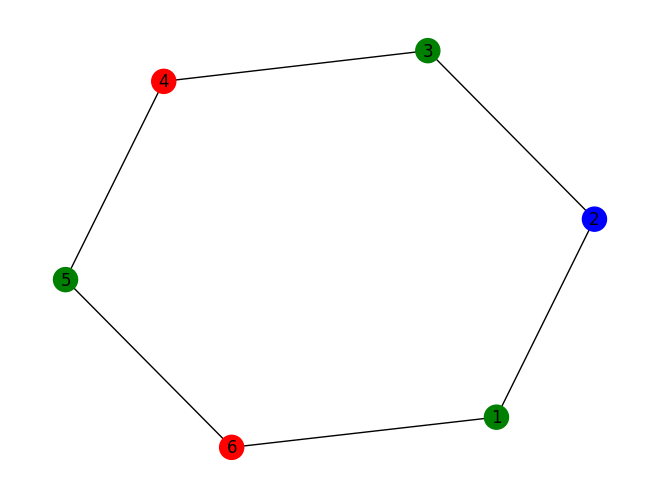

----------------------------------------------------------
test 2 is completed
assignment: 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1
Too many colors to plot for test 2
----------------------------------------------------------
test 3 is completed
assignment: NO
----------------------------------------------------------
test 4 is completed
assignment: 1 2 3 1 2 1


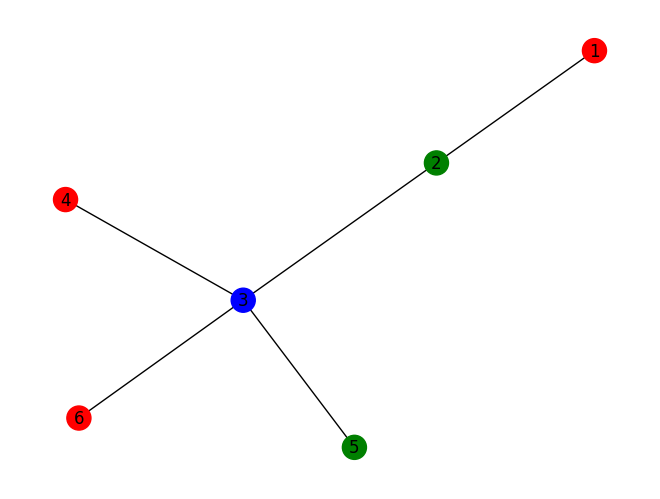

----------------------------------------------------------
test 5 is completed
assignment: 1 2 3 4 5


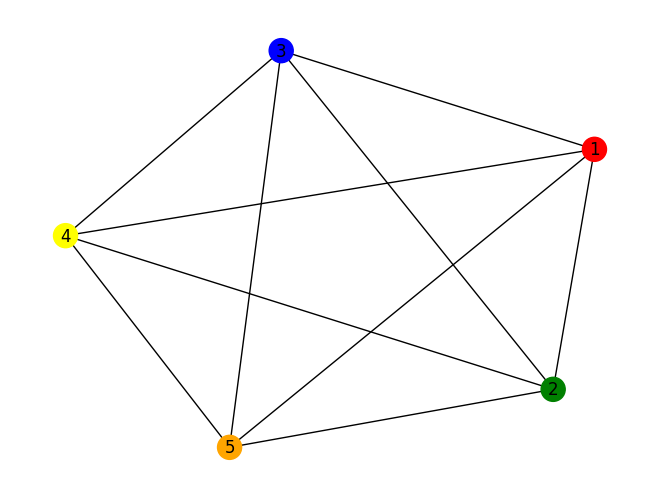

----------------------------------------------------------
Score = 100.0%


In [45]:
import Helper_codes.csp_helper as csp
import time
import networkx as nx
import matplotlib.pyplot as plt


def plot_test_case(result, n, next_e_lines, test_num):   # Do not change this function. This is for plotting the assignment. 
    if result == 'NO':
        return
    reult_list = result.split()
    reult_list = list(map(int, reult_list))
    if len(reult_list) >= 15:
        print(f'Too many colors to plot for test {test_num + 1}')
        return

    G = nx.Graph()
    G.add_nodes_from(range(1, n + 1))
    for edge in next_e_lines:
        G.add_edge(edge[0], edge[1])
    colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'gray', 'black', 'cyan', 'magenta', 'olive', 'teal']
    
    color_map = []
    for i in range(1, n + 1):
        color_map.append(colors[reult_list[i - 1] - 1])
          
    nx.draw(G, node_color=color_map, with_labels=True)
    plt.show()
 

TIME_LIMIT = 3

tests = csp.get_all_tests(prefix='csp_')
tests_passed = 0
for test_num, test in enumerate(tests):
    n, m, m_next_lines, e, next_e_lines = csp.scan_test_input(test)
    #################################################################
    # (Point: 5% of total score)                                    #
    # under this comment section implement a code to handle inputs  #
    #################################################################
    csp_domains = [[] for i in range(n)]
    for eid, halls in enumerate(m_next_lines):
        for hid in halls:
            csp_domains[hid - 1].append(eid + 1)
    csp_constraints = [(h1 - 1, h2 - 1) for h1, h2 in next_e_lines]

    start_time = time.time()
    result = backtracking_search(csp_domains, csp_constraints)
    print(f'test {test_num + 1} is completed')
    print(f'assignment: {result}')
    total_time = time.time() - start_time
    if csp.is_result_valid(test, result) and total_time < TIME_LIMIT:
        tests_passed += 1
    else:
        print(f'test {test} failed. time elapsed= {total_time}')
    plot_test_case(result, n, next_e_lines, test_num)
    print('----------------------------------------------------------')
# (Point: 50% of your total score)                                    #
print(f'Score = {tests_passed / len(tests) * 100}%')